In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["dir_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    229250.000000
mean        147.828471
std         120.560398
min          -1.000000
25%           0.000000
50%         190.000000
75%         240.000000
max         360.000000
Name: dir_o, dtype: float64

In [4]:
#Count values for skyc1
station=station_all[["skyc1_o","temp_o"]]
station["skyc1_o"].value_counts()


M      122708
FEW     36527
SCT     28960
BKN     22790
VV       8354
NSC      3610
OVC      3167
         3134
Name: skyc1_o, dtype: int64

In [5]:
#"   "meaning cavok or nil nan delete in concat
pd.options.display.max_rows = 999
station_all.loc[station_all.skyc1_o=="   "].sample(100)

,temp_o,tempd_o,rh_o,dir_o,spd_o,wind_gust_o,mslp_o,visibility_o,skyc1_o,skyc2_o,skyc3_o,skyl1_o,skyl2_o,skyl3_o,wxcodes_o,metar_o,fr_o
time,,,,,,,,,,,,,,,,,
2011-12-30 17:30:00,280.149999,277.150000,81.20,310.0,2.057776,M,1036.0,9994.0,,,,M,M,M,M,LEVX 301730Z 31004KT CAVOK 07/04 Q1036,VFR
2011-09-13 08:30:00,292.149998,290.149999,88.18,0.0,1.028888,M,1019.0,9994.0,,,,M,M,M,M,LEVX 130830Z VRB02KT CAVOK 19/17 Q1019,VFR
2011-12-24 18:00:00,280.149999,278.150000,87.09,-1.0,0.514444,M,1033.0,9994.0,,,,M,M,M,M,LEVX 241800Z VRB01KT CAVOK 07/05 Q1033,VFR
2011-11-27 12:30:00,NaN,NaN,NaN,-1.0,NaN,M,NaN,NaN,,,,M,M,M,M,LEVX 271230Z NIL,VFR
2012-01-08 03:00:00,279.150000,279.150000,100.00,0.0,0.000000,M,1029.0,9994.0,,,,M,M,M,M,LEVX 080300Z 00000KT CAVOK 06/06 Q1029,VFR
2011-12-22 01:30:00,281.150001,280.149999,93.40,10.0,2.057776,M,1032.0,9994.0,,,,M,M,M,M,LEVX 220130Z 01004KT CAVOK 08/07 Q1032,VFR
2011-10-28 15:30:00,290.149999,283.150000,63.38,-1.0,1.028888,M,1022.0,9994.0,,,,M,M,M,M,LEVX 281530Z VRB02KT CAVOK 17/10 Q1022,VFR
2011-10-30 22:30:00,285.149999,284.150000,93.60,-1.0,0.514444,M,1018.0,9994.0,,,,M,M,M,M,LEVX 302230Z VRB01KT CAVOK 12/11 Q1018,VFR
2011-10-09 02:30:00,285.149999,282.150000,81.87,200.0,3.086664,M,1025.0,9994.0,,,,M,M,M,M,LEVX 090230Z 20006KT 110V230 CAVOK 12/09 Q1025,VFR


In [6]:
station.loc[station.skyc1_o=="   ",["skyc1_l"]]="CAVOK"
station.loc[station.skyc1_o=="M",["skyc1_l"]]="CAVOK" 
station.loc[station.skyc1_o=="VV ",["skyc1_l"]]="VV"
station.loc[station.skyc1_o=="FEW",["skyc1_l"]]="FEW"
station.loc[station.skyc1_o=="SCT",["skyc1_l"]]="SCT"
station.loc[station.skyc1_o=="BKN",["skyc1_l"]]="BKN"
station.loc[station.skyc1_o=="OVC",["skyc1_l"]]="OVC"
station.loc[station.skyc1_o=="NSC",["skyc1_l"]]="NSC"
station=station.drop(columns=["temp_o"])
station['skyc1_l'].value_counts()
labels=['CAVOK', 'FEW', 'SCT', 'BKN', 'VV', 'NSC', 'OVC']
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
station.sample(100)

,skyc1_o,skyc1_l
time,,
2011-12-26 13:00:00,,CAVOK
2010-05-09 10:30:00,M,CAVOK
2014-02-06 00:30:00,BKN,BKN
2011-09-26 01:00:00,FEW,FEW
2010-03-17 17:00:00,M,CAVOK
2010-11-30 14:00:00,M,CAVOK
2018-12-04 11:30:00,FEW,FEW
2016-02-07 02:00:00,SCT,SCT
2014-06-30 22:30:00,VV,VV


**Forecast D0**

In [22]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [23]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["skyc1_o"])
df_all4k.sample(100)

,skyc1_l,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2014-12-26 06:00:00,VV,119.377197,1.785632,3.312945,103485.804688,279.503510,0.902968,24037.117188,2.116022,266.968445,...,0.000000,0.000289,0.0,0.000000,0.00,0.000000,5742.033203,1612.722778,256.255737,277.528259
2020-08-31 14:00:00,CAVOK,285.843597,2.381444,1.527667,101923.343750,296.093750,0.413868,24128.980469,212.972321,309.612396,...,0.000000,0.000026,0.0,0.000000,0.00,0.000000,5736.341797,1518.030396,262.156067,284.407928
2008-12-30 17:00:00,CAVOK,141.630325,4.941578,9.143993,101739.359375,286.378113,0.774895,24045.966797,59.437336,336.452301,...,0.000000,0.000035,1.0,0.002675,0.51,1.000000,5610.642090,1477.135132,256.730072,278.720062
2009-05-29 11:00:00,CAVOK,258.278076,1.498884,1.565202,101685.148438,302.009430,0.293548,24135.000000,300.371704,330.996063,...,0.000000,-0.008125,0.0,0.000000,0.00,0.000000,5736.507812,1526.265137,258.466309,288.711700
2020-09-23 06:00:00,SCT,262.707916,2.748960,4.877258,101124.046875,289.697510,0.998906,233.131821,1.004784,398.625549,...,184.460007,-0.001055,0.4,0.389904,0.00,0.400000,5622.026855,1446.568115,260.647308,282.728058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-28 10:00:00,CAVOK,105.529015,6.053035,9.926862,102792.492188,279.857239,0.636806,24213.125000,102.399277,247.473511,...,0.000000,0.000044,0.0,0.000000,0.00,0.000000,5555.525879,1535.151245,246.852814,275.592957
2013-09-09 08:00:00,CAVOK,353.165405,0.553833,1.125873,102590.718750,289.046875,0.485243,24045.611328,32.259632,323.536743,...,0.000000,-0.000875,0.0,0.000000,0.00,0.000000,5785.444824,1572.647339,261.709198,285.416504
2013-06-19 03:00:00,SCT,347.926483,2.703113,6.094239,101783.757812,284.729370,0.999986,243.608429,-2.312857,374.306580,...,0.780000,-0.000168,0.0,0.526583,0.00,0.526583,5624.186035,1474.700317,258.155762,279.793427


In [24]:
df_all4k["skyc1_l"].value_counts(normalize=True)

CAVOK    0.562007
FEW      0.160032
SCT      0.122557
BKN      0.093688
VV       0.032753
NSC      0.015464
OVC      0.013498
Name: skyc1_l, dtype: float64

**climate change**

In [25]:
df_all4k["skyc1_l"][50000:].value_counts(normalize=True)

CAVOK    0.398934
FEW      0.220210
SCT      0.153880
BKN      0.129018
VV       0.054839
OVC      0.022394
NSC      0.020725
Name: skyc1_l, dtype: float64

In [26]:
df_all4k=df_all4k[50000:]

In [27]:
df_all4k=df_all4k[df_all4k.skyc1_l!="NSC"]
df_all4k=df_all4k[df_all4k.skyc1_l!="VV"]
df_all4k["skyc1_l"].value_counts(normalize=True)

CAVOK    0.431544
FEW      0.238210
SCT      0.166459
BKN      0.139564
OVC      0.024224
Name: skyc1_l, dtype: float64

**Random variable**

In [14]:
#df_all4k['random'] = np.random.random(size = len(df_all4k))

**machine learning d0**

In [43]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'skyc1_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.20,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,skyc1_l
2,Target Type,Multiclass
3,Label Encoded,"BKN: 0, CAVOK: 1, FEW: 2, OVC: 3, SCT: 4"
4,Original Data,"(52055, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=5,sort="F1")

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:35:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


In [44]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6183,0.8612,0.4314,0.5914,0.5992,0.4455,0.4477
1,0.6136,0.8570,0.4240,0.5816,0.5929,0.4379,0.4406
2,0.6177,0.8559,0.4316,0.5897,0.5988,0.4442,0.4465
3,0.6144,0.8582,0.4340,0.5878,0.5950,0.4396,0.4421
4,0.6194,0.8624,0.4369,0.5927,0.6010,0.4472,0.4494
Mean,0.6167,0.8590,0.4316,0.5886,0.5974,0.4429,0.4453
Std,0.0023,0.0025,0.0043,0.0039,0.0030,0.0035,0.0034


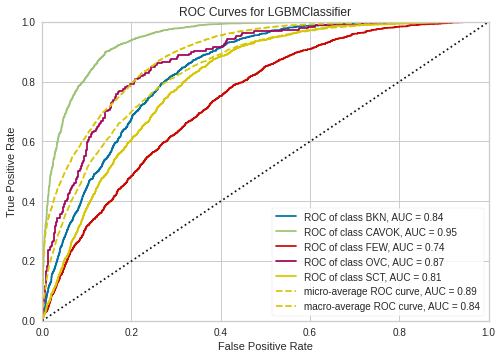

In [45]:
plot_model(model, plot = 'auc')

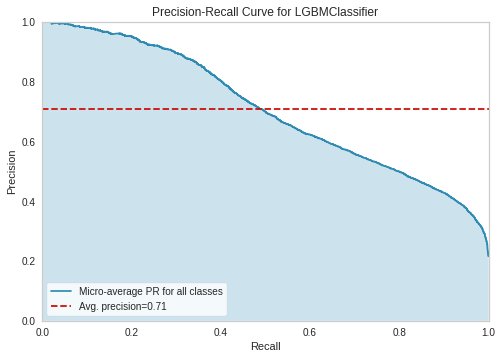

In [46]:
plot_model(model, plot = 'pr')

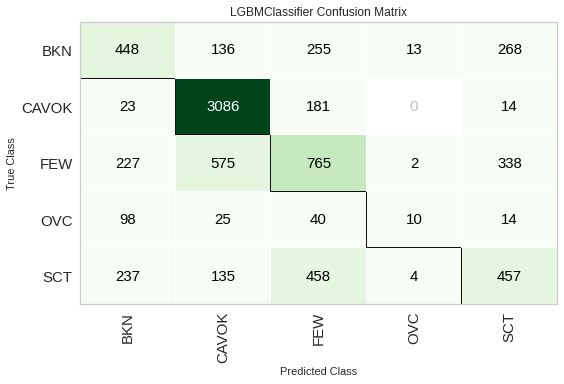

In [47]:
plot_model(model,'confusion_matrix')

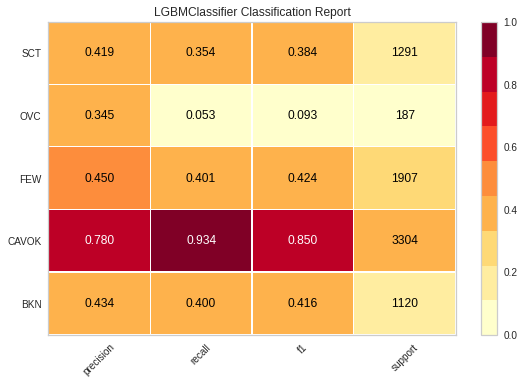

In [48]:
plot_model(model,'class_report')

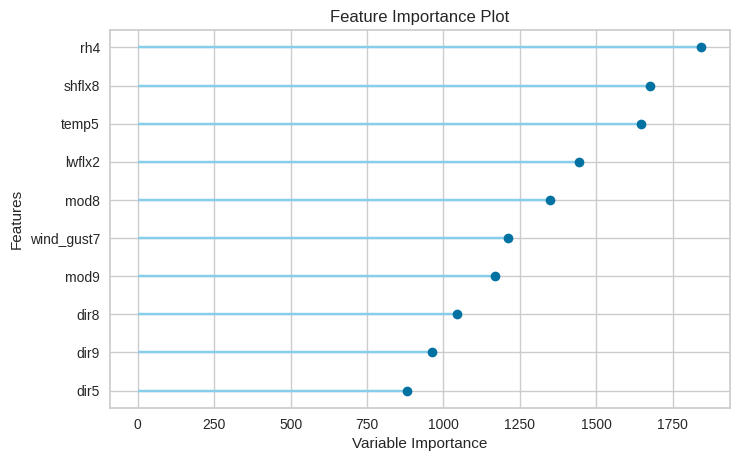

In [49]:
plot_model(model,"feature")

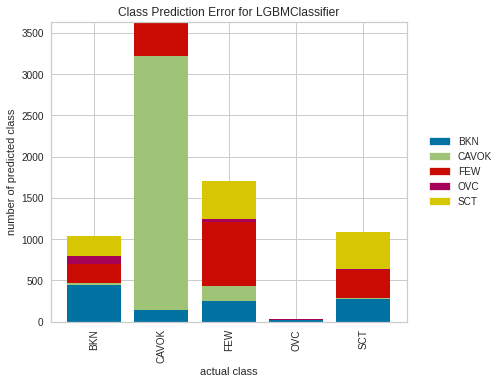

In [50]:
plot_model(model,"error")

**Export model**

In [51]:
x_var=get_config("X_train").columns
x_var

Index(['mod9', 'temp5', 'cfl9', 'dir9', 'cft9', 'cin5', 'cin7', 'dir0',
       'lwflx2', 'dir5', 'rh4', 'dir4', 'cft8', 'dir3', 'cape4', 'wind_gust7',
       'cin4', 'cfl4', 'cin6', 'mod8', 'cape9', 'shflx8', 'dir8'],
      dtype='object')

In [52]:
#define x and y
Y=df_all4k.skyc1_l
X=df_all4k[x_var]

In [65]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=250).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


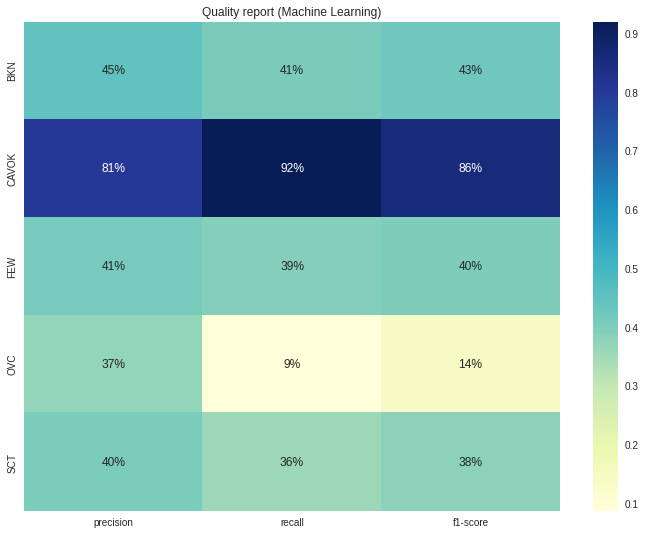

In [66]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


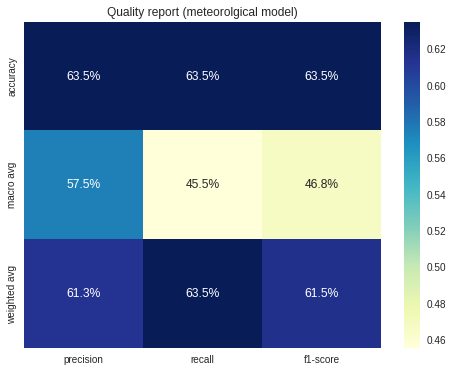

In [61]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorolgical model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

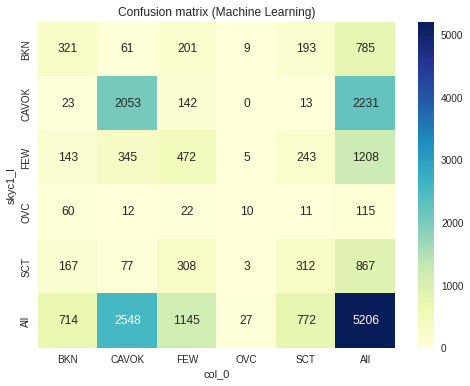

In [68]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

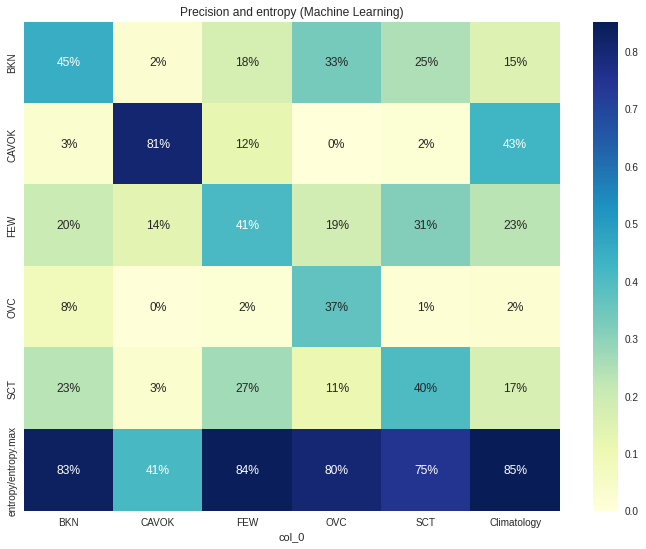

In [69]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy (Machine Learning)")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [70]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("skyc1_LEVX_d0.al", 'wb'))